# Quality Control on spatial proteomics with Harpy

## Introduction

This noteboook outlines some quality controls steps for highly-multiplexed spatial proteomics data using the Harpy package. The levels of quality control are:

- **Image level**: to give an overview of the quality of the images in the dataset.
- **Segmentation level**: to give an overview of the quality of the segmentation in the dataset.
- **Cell level**: to give an overview of the quality of the calculated features per cell in the dataset.

We start by loading in an example dataset and visualising the data:


In [38]:
%load_ext autoreload
%autoreload 2

import sparrow as sp
import spatialdata_plot
from sparrow.datasets.proteomics import mibi_example

sdata = mibi_example()
sdata

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/models/models.py:1030: UserWarning: The geometry column of the GeoDataFrame has 3 dimensions, while 2 is expected. Please consider discarding the third dimension as it could led to unexpected behaviors. To achieve so, you can use `.force_2d()` if you are using `geopandas > 0.14.3, otherwise you can use `force_2d()` from `spatialdata.models`.
  schema().validate(e)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/_elements.py:100: UserWarning: The geometry column of the GeoDataFrame has 3 dimensions, while 2 is expected. Please consider discarding the third dimension as it could led to unexpected behaviors. To achieve so, you can use `.force_2d()` if you are using `geopandas > 0.14.3, otherwise you can use `force_2d()` from `spatialdata.models`.
  ShapesModel().validate(value)


SpatialData object
├── Images
│     ├── 'combine': DataArray[cyx] (2, 512, 512)
│     ├── 'combine_z': DataArray[czyx] (2, 2, 512, 512)
│     ├── 'combine_z_16bit': DataArray[czyx] (2, 2, 512, 512)
│     ├── 'combine_z_apply': DataArray[czyx] (2, 2, 512, 512)
│     ├── 'preprocessed_contrast': DataArray[czyx] (2, 2, 512, 512)
│     ├── 'preprocessed_min_max': DataArray[czyx] (2, 2, 512, 512)
│     └── 'raw_image': DataArray[cyx] (22, 512, 512)
├── Labels
│     ├── 'masks_cellpose': DataTree[yx] (100, 100), (50, 50), (25, 25), (12, 12), (6, 6)
│     ├── 'masks_cellpose_3D': DataTree[zyx] (2, 60, 30), (1, 30, 15)
│     ├── 'masks_cellpose_3D_expanded': DataArray[zyx] (2, 60, 30)
│     ├── 'masks_nuclear': DataArray[yx] (512, 512)
│     ├── 'masks_nuclear_aligned': DataArray[yx] (512, 512)
│     └── 'masks_whole': DataArray[yx] (512, 512)
├── Shapes
│     ├── 'masks_cellpose_3D_boundaries': GeoDataFrame shape: (10, 1) (2D shapes)
│     ├── 'masks_cellpose_3D_expanded_boundaries': GeoDataF

/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/models/models.py:1030: UserWarning: The geometry column of the GeoDataFrame has 3 dimensions, while 2 is expected. Please consider discarding the third dimension as it could led to unexpected behaviors. To achieve so, you can use `.force_2d()` if you are using `geopandas > 0.14.3, otherwise you can use `force_2d()` from `spatialdata.models`.
  schema().validate(e)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-packages/spatialdata/_core/_elements.py:100: UserWarning: The geometry column of the GeoDataFrame has 3 dimensions, while 2 is expected. Please consider discarding the third dimension as it could led to unexpected behaviors. To achieve so, you can use `.force_2d()` if you are using `geopandas > 0.14.3, otherwise you can use `force_2d()` from `spatialdata.models`.
  ShapesModel().validate(value)
/opt/homebrew/Caskroom/mambaforge/base/envs/harpy/lib/python3.10/site-pack

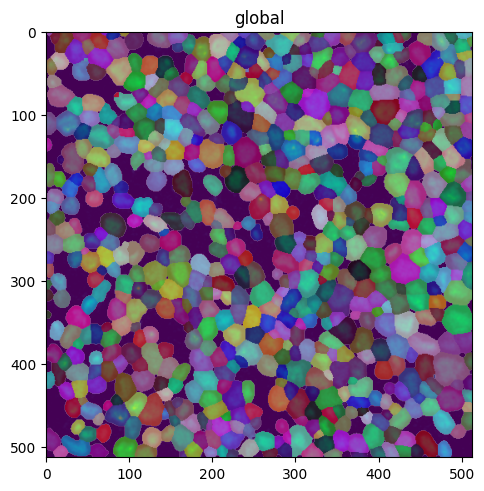

In [39]:
sdata.pl.render_images("combine", channel=0).pl.render_labels("masks_whole").pl.show()

## Image level quality control


In [40]:
sp.pl.calculate_snr_ratio(sdata)

,cycle,channel,snr,signal
0,None,0,11.429461,0.012676
1,None,1,20.913000,0.053579
2,None,2,11.157254,0.039202
3,None,3,11.251359,0.011660
4,None,4,62.866940,0.013267
5,None,5,7.188004,0.019916
6,None,6,5.089168,0.026168
7,None,7,29.878094,0.012073
8,None,8,23.107656,0.016545
9,None,9,108.373192,0.064498


<Axes: xlabel='Signal intensity', ylabel='Signal-to-noise ratio'>

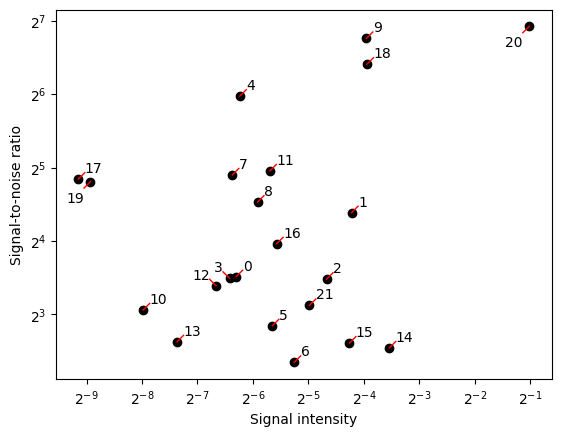

In [59]:
sp.pl.snr_ratio(sdata)